In this assignment, you are provided with a file `net
ix titles.csv'. This
dataset consists of TV shows and movies available on Net
ix as of 2019.
The dataset contains the following features:

In [2]:
#import librairies:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [3]:

csv_file = pd.read_csv('netflix_titles.csv')


In [4]:
csv_file.shape

(6234, 12)

In [5]:
#1.1. Check duplicates values in the dataset

csv_file.loc[csv_file.duplicated(), :]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [6]:
#1.2.Find the missing rows in each column.
csv_file.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
#1.2.Find the missing rows in each column.
director = csv_file[csv_file['director'].isnull()]
cast = csv_file[csv_file['cast'].isnull()]
country = csv_file[csv_file['country'].isnull()]
date_added = csv_file[csv_file['date_added'].isnull()]
rating = csv_file[csv_file['rating'].isnull()]

df_row = pd.concat([director, cast, country, date_added, rating])
df_row

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4403,80092835,Movie,Fireplace 4K: Crackling Birchwood from Firepla...,George Ford,NaN,NaN,"December 21, 2015",2015,NaN,60 min,Movies,"For the first time in 4K Ultra-HD, everyone's ..."
4706,80039789,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
5015,80114111,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
5234,80161109,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."


In [8]:
#1.3. Remove the NaN values from the dataset.
no_nan = csv_file.dropna()
no_nan 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...
...,...,...,...,...,...,...,...,...,...,...,...,...
6142,80063224,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"August 30, 2019",2019,TV-PG,7 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
6158,80164216,TV Show,Miraculous: Tales of Ladybug & Cat Noir,Thomas Astruc,"Cristina Vee, Bryce Papenbrook, Keith Silverst...","France, South Korea, Japan","August 2, 2019",2018,TV-Y7,4 Seasons,"Kids' TV, TV Action & Adventure","When Paris is in peril, Marinette becomes Lady..."
6167,80115328,TV Show,Sacred Games,"Vikramaditya Motwane, Anurag Kashyap","Saif Ali Khan, Nawazuddin Siddiqui, Radhika Ap...","India, United States","August 15, 2019",2019,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Dramas",A link in their pasts leads an honest cop to a...
6182,80176842,TV Show,Men on a Mission,Jung-ah Im,"Ho-dong Kang, Soo-geun Lee, Sang-min Lee, Youn...",South Korea,"April 9, 2019",2019,TV-14,4 Seasons,"International TV Shows, Korean TV Shows, Stand...",Male celebs play make-believe as high schooler...


In [9]:
#1.4.change the `date added' values to the only year. And rename the column: `added year'.
csv_cc = no_nan .rename(columns = {"date_added": "added_year"})

new_col = csv_cc['added_year'].str.split(',')

# code to split it into 2 lists 
year_list = [i[1] for i in new_col] 

csv_cc['added_year'] = year_list

csv_cc

,show_id,type,title,director,cast,country,added_year,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017,2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2017,2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...
...,...,...,...,...,...,...,...,...,...,...,...,...
6142,80063224,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2019,2019,TV-PG,7 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
6158,80164216,TV Show,Miraculous: Tales of Ladybug & Cat Noir,Thomas Astruc,"Cristina Vee, Bryce Papenbrook, Keith Silverst...","France, South Korea, Japan",2019,2018,TV-Y7,4 Seasons,"Kids' TV, TV Action & Adventure","When Paris is in peril, Marinette becomes Lady..."
6167,80115328,TV Show,Sacred Games,"Vikramaditya Motwane, Anurag Kashyap","Saif Ali Khan, Nawazuddin Siddiqui, Radhika Ap...","India, United States",2019,2019,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Dramas",A link in their pasts leads an honest cop to a...
6182,80176842,TV Show,Men on a Mission,Jung-ah Im,"Ho-dong Kang, Soo-geun Lee, Sang-min Lee, Youn...",South Korea,2019,2019,TV-14,4 Seasons,"International TV Shows, Korean TV Shows, Stand...",Male celebs play make-believe as high schooler...


In [10]:
#1.5. Make a copy of the dataset
new_df = csv_cc.copy()


In [11]:
#1.6. In the copied dataset,remove all the columns, except for the `show-id', `type' and `cast'.
import random


new_df1 = new_df.drop(["title", "title","director", "country", "added_year", "release_year","rating", "duration","listed_in","description"], axis=1)

new_df_ord = new_df1[['cast', 'show_id', 'type']]

actors = []
show_ids = []
show_type = []

ids = new_df_ord["show_id"].tolist()
types = new_df_ord["type"].tolist()

counter = 0
couch = new_df_ord["cast"].to_dict()
for key, values in couch.items():
    names = values.split(',')   
    
    for name in names:
        n = name.strip()
        actors.append(n)
        show_ids.append(ids[counter])
        show_type.append(types[counter])
        
    counter = counter + 1
    
percentile_list = pd.DataFrame({'actor_name': actors,'show_id': show_ids,'type': show_type})
percentile_list
# new_df_ord

,actor_name,show_id,type
0,Alan Marriott,81145628,Movie
1,Andrew Toth,81145628,Movie
2,Brian Dobson,81145628,Movie
3,Cole Howard,81145628,Movie
4,Jennifer Cameron,81145628,Movie
...,...,...,...
29384,Cengiz Bozkurt,80126599,TV Show
29385,Osman Sonant,80126599,TV Show
29386,Köksal Engür,80126599,TV Show
29387,Ege Tanman,80126599,TV Show


In [12]:
#Data Discovering:
#2.1. Plot the Number of Movies vs TV shows.

csv_cc['type'].value_counts()

Movie      3678
TV Show      96
Name: type, dtype: int64

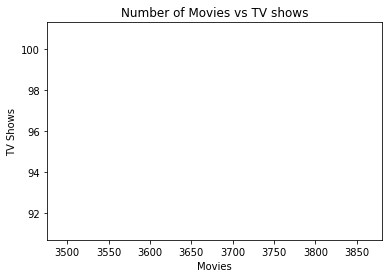

In [ ]:
plt.plot(3678,96)
plt.title('Number of Movies vs TV shows')
plt.xlabel('Movies')
plt.ylabel('TV Shows')
plt.show()

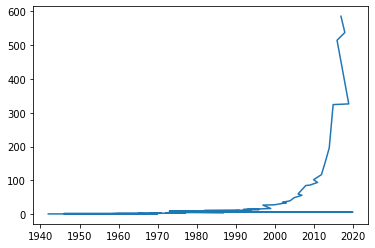

In [ ]:
#2.2 Plot the number of releases per year. Give an interpretation.
csv_cc['release_year'].value_counts().plot()

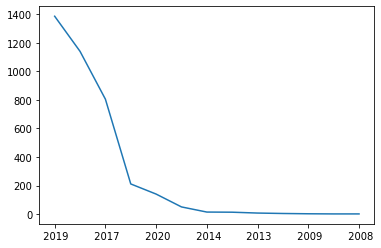

In [ ]:
#2.3.What is the highest year in adding new shows?
csv_cc['added_year'].value_counts().plot()

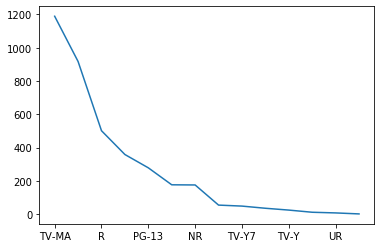

In [ ]:
#2.4 What are the types of ratings for the movies? Plot for each rating the number of movies.
csv_cc['rating'].value_counts().plot()